In [60]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Specify current directory and directory with data files
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir,r'20210205_LinkingIntrinsicAndApparentRelationships')
    
# Name of the Scenario 1 netCDF Source File
    
s1_source_file = 'Scenario1SourceFile.nc'

In [61]:
# Assign the data to the proper variable and assign names; most of the
# variables have latitude, longitude, month, and depth; for Scenario 1
# we are just using the surface values where depth=1

data = nc.Dataset(os.path.join(data_dir,s1_source_file))
lat = data['GEOLAT_T'][:]
lon = data['GEOLON_T'][:]
time_initial = data['TIME'][:]
po4 = data['PO4'][:]
po4 = np.squeeze(po4)
fed = data['FED'][:]
fed = np.squeeze(fed)
irr_mix = data['IRR_MIX'][:]
irr_mix = np.squeeze(irr_mix)

In [8]:
# Calculate the limitation terms based on the inputs from phosphate, iron, and light

pstar = 1.9e-6

phoslim = po4/(1e-7+po4)
ironlim = fed/(2e-10+fed)
lightlim = irr_mix/(34.3+irr_mix)

pl_size = phoslim.shape
bio = np.empty((12,80,120))
bio[:] = np.nan

for i in range(12):
    for j in range(80):
        for k in range(120):
            if phoslim[i,j,k] < ironlim[i,j,k]:
                bio[i,j,k] = pstar*phoslim[i,j,k]*lightlim[i,j,k]
            elif ironlim[i,j,k] < phoslim[i,j,k]:
                bio[i,j,k] = pstar*ironlim[i,j,k]*lightlim[i,j,k]

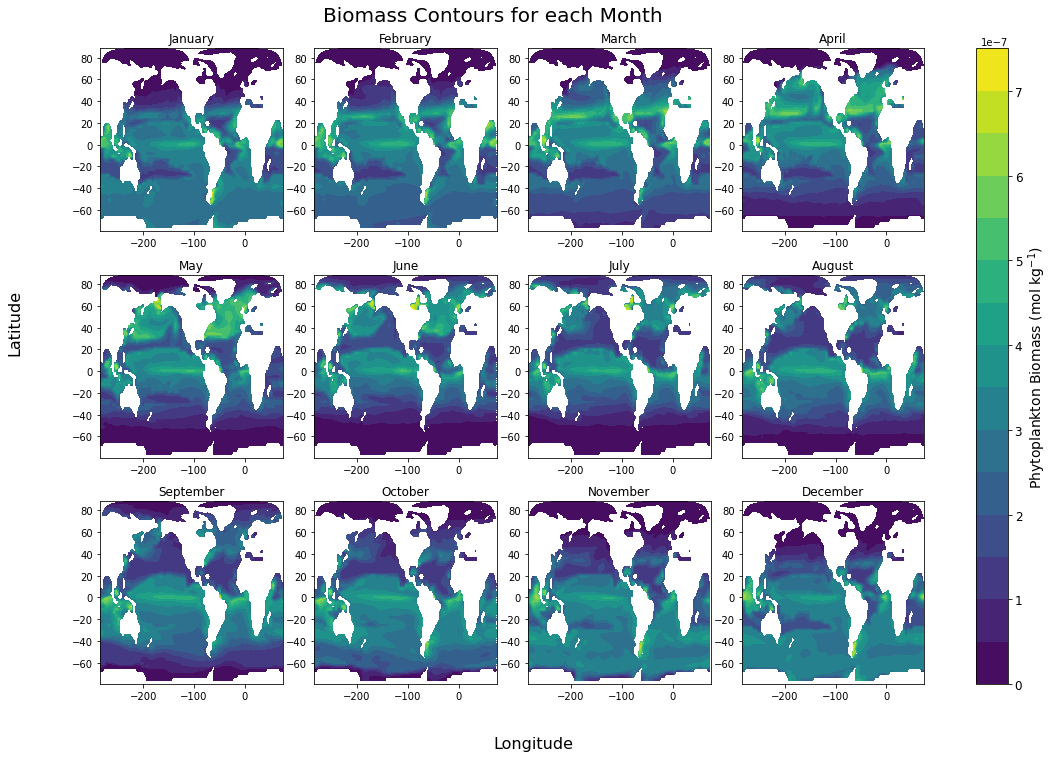

In [54]:
# Contours for phytoplankton biomass

months = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']
fmax = np.nanmax(bio)
fmin = np.nanmin(bio)
fig, axs = plt.subplots(3,4,figsize=(15,10))
fig.suptitle('Biomass Contours for each Month',fontsize=20,x=0.4)
fig.text(0.4,-0.05,'Longitude',fontsize=16)
fig.text(-0.05,0.5,'Latitude',rotation='vertical',fontsize=16)

for i in range(3):
    for j in range(4):
        axs[i,j].contourf(lon,lat,bio[4*i+j,:,:],vmin=fmin,vmax=fmax,levels=15)
        axs[i,j].set_title(months[4*i+j])
        
plt.tight_layout()
cbar = plt.colorbar(axs[2,3].contourf(lon,lat,bio[4*i+j,:,:],vmin=fmin,vmax=fmax,levels=15),ax=axs)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Phytoplankton Biomass (mol kg$^{-1}$)',fontsize=14)
plt.show()

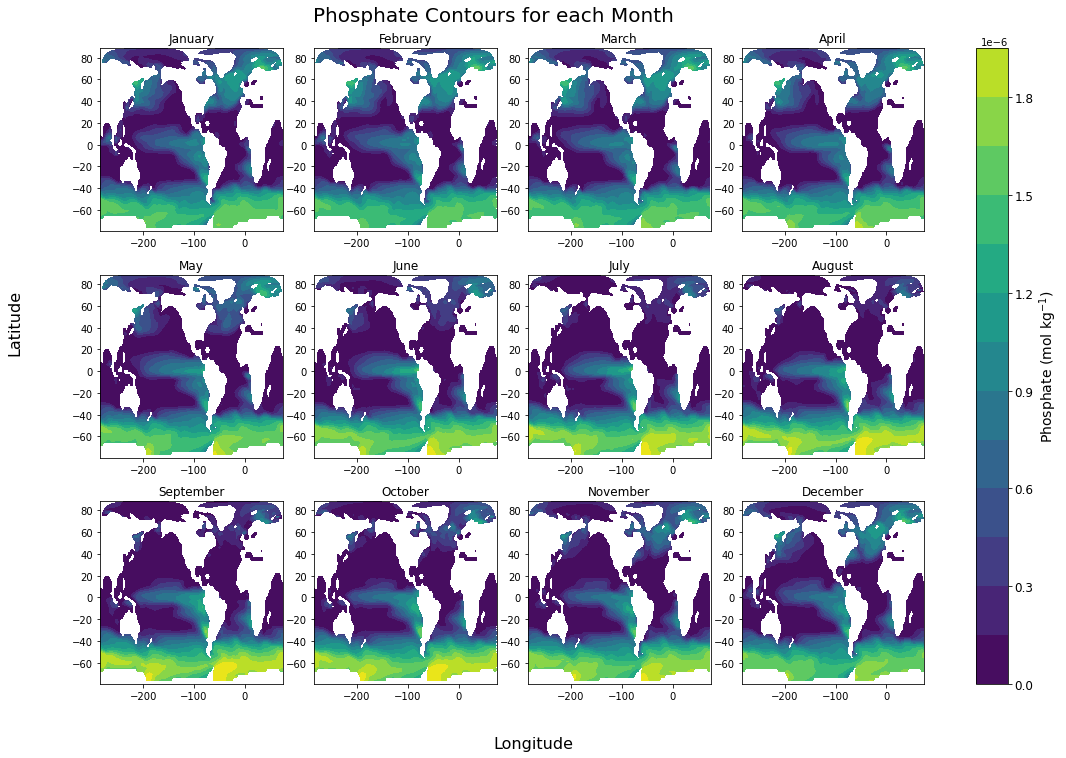

In [55]:
# Contours for phosphate

months = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']
fmax = np.nanmax(po4)
fmin = np.nanmin(po4)
fig, axs = plt.subplots(3,4,figsize=(15,10))
fig.suptitle('Phosphate Contours for each Month',fontsize=20,x=0.4)
fig.text(0.4,-0.05,'Longitude',fontsize=16)
fig.text(-0.05,0.5,'Latitude',rotation='vertical',fontsize=16)

for i in range(3):
    for j in range(4):
        axs[i,j].contourf(lon,lat,po4[4*i+j,:,:],vmin=fmin,vmax=fmax,levels=15)
        axs[i,j].set_title(months[4*i+j])
        
plt.tight_layout()
cbar = plt.colorbar(axs[2,3].contourf(lon,lat,po4[4*i+j,:,:],vmin=fmin,vmax=fmax,levels=15),ax=axs)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Phosphate (mol kg$^{-1}$)',fontsize=14)
plt.show()

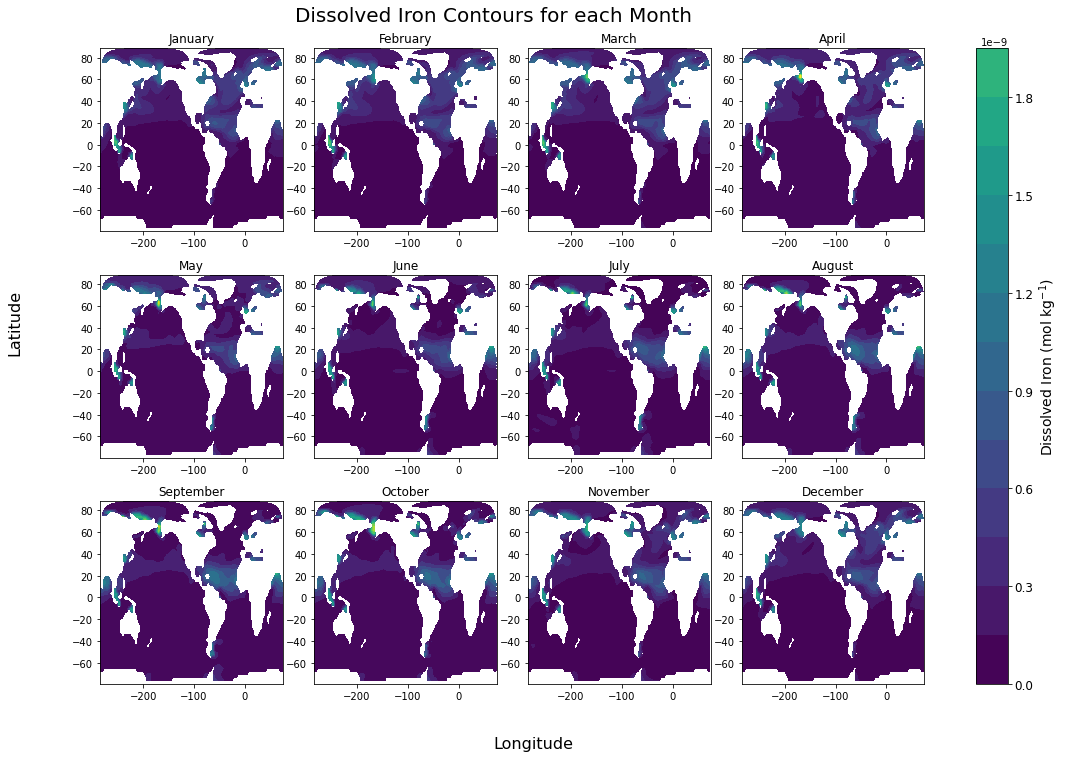

In [56]:
# Contours for dissolved iron

months = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']
fmax = np.nanmax(fed)
fmin = np.nanmin(fed)
fig, axs = plt.subplots(3,4,figsize=(15,10))
fig.suptitle('Dissolved Iron Contours for each Month',fontsize=20,x=0.4)
fig.text(0.4,-0.05,'Longitude',fontsize=16)
fig.text(-0.05,0.5,'Latitude',rotation='vertical',fontsize=16)

for i in range(3):
    for j in range(4):
        axs[i,j].contourf(lon,lat,fed[4*i+j,:,:],vmin=fmin,vmax=fmax,levels=15)
        axs[i,j].set_title(months[4*i+j])
        
plt.tight_layout()
cbar = plt.colorbar(axs[2,3].contourf(lon,lat,fed[4*i+j,:,:],vmin=fmin,vmax=fmax,levels=15),ax=axs)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Dissolved Iron (mol kg$^{-1}$)',fontsize=14)
plt.show()

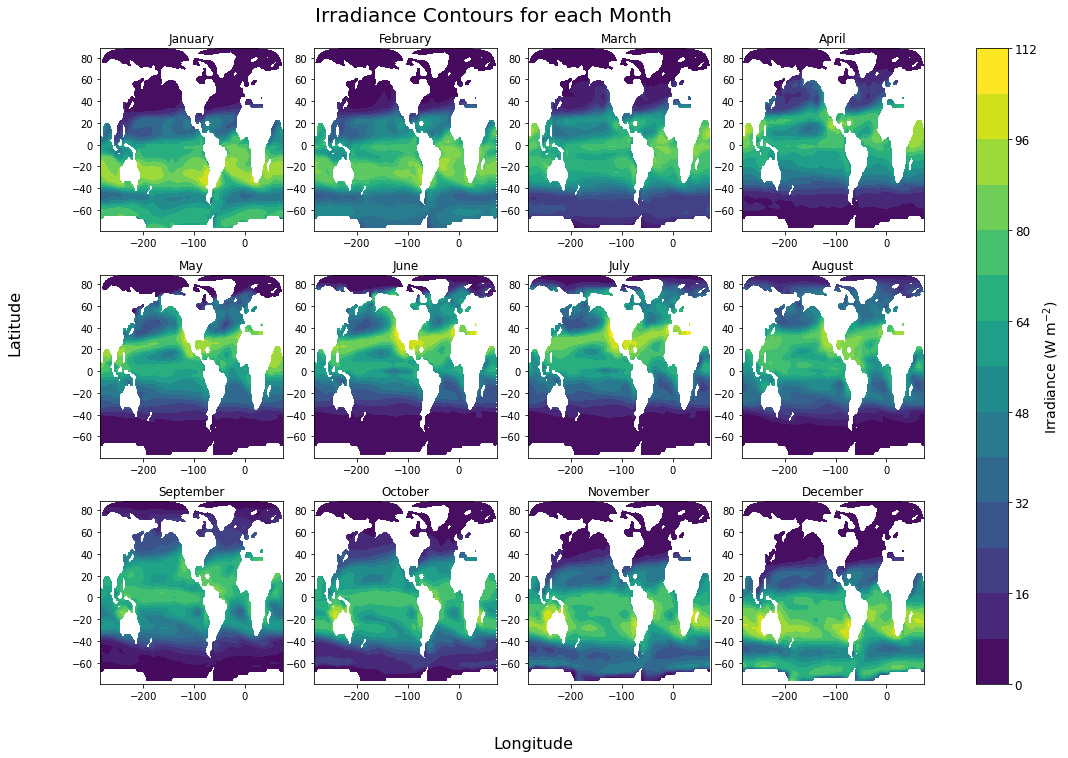

In [57]:
# Contours for irradiance

months = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']
fmax = np.nanmax(irr_mix)
fmin = np.nanmin(irr_mix)
fig, axs = plt.subplots(3,4,figsize=(15,10))
fig.suptitle('Irradiance Contours for each Month',fontsize=20,x=0.4)
fig.text(0.4,-0.05,'Longitude',fontsize=16)
fig.text(-0.05,0.5,'Latitude',rotation='vertical',fontsize=16)

for i in range(3):
    for j in range(4):
        axs[i,j].contourf(lon,lat,irr_mix[4*i+j,:,:],vmin=fmin,vmax=fmax,levels=15)
        axs[i,j].set_title(months[4*i+j])
        
plt.tight_layout()
cbar = plt.colorbar(axs[2,3].contourf(lon,lat,irr_mix[4*i+j,:,:],vmin=fmin,vmax=fmax,levels=15),ax=axs)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Irradiance (W m$^{-2}$)',fontsize=14)
plt.show()

In [22]:
# Move the values from each matrix into a column corresponding to the correct
# latitude, longitude, and month; creates matrix where each column corresponds
# to a variable and each row corresponds to an observation

index_matrix = range(1,9601)
index_matrix = np.reshape(index_matrix,(120,80))

final = np.empty((120*80*12,8))
final[:] = np.nan

for i in range(12):
    for j in range(80):
        for k in range(120):
            index_number = index_matrix[k,j]
            final[index_number+((i-1)*9600),0] = index_number + ((i-1)*9600)
            final[index_number+((i-1)*9600),1] = lat[j,k]
            final[index_number+((i-1)*9600),2] = lon[j,k]
            final[index_number+((i-1)*9600),3] = time_initial[i]
            final[index_number+((i-1)*9600),4] = po4[i,j,k]
            final[index_number+((i-1)*9600),5] = fed[i,j,k]
            final[index_number+((i-1)*9600),6] = irr_mix[i,j,k]
            final[index_number+((i-1)*9600),7] = bio[i,j,k]
            
final = final[~np.isnan(final).any(axis=1),:]

C:\Users\holde\AppData\Local\Temp/ipykernel_16180/391882387.py:19: UserWarning: Warning: converting a masked element to nan.
  final[index_number+((i-1)*9600),4] = po4[i,j,k]
C:\Users\holde\AppData\Local\Temp/ipykernel_16180/391882387.py:20: UserWarning: Warning: converting a masked element to nan.
  final[index_number+((i-1)*9600),5] = fed[i,j,k]
C:\Users\holde\AppData\Local\Temp/ipykernel_16180/391882387.py:21: UserWarning: Warning: converting a masked element to nan.
  final[index_number+((i-1)*9600),6] = irr_mix[i,j,k]


In [23]:
# Create lists for variable names and units

variables = ['Index','Latitude','Longitude','Month','Macronutrient','Micronutrient','Irradiance','Biomass']
units = ['','degrees E','degrees N','','mol/kg','mol/kg','W/m2','mol/kg']

In [25]:
# Specify the response and predictor columns

resp = [7]
pred = [4,5,6]

In [27]:
# Scale each variable to -1 to 1

rescale = preprocessing.MinMaxScaler(feature_range=(-1,1))

finalRS = rescale.fit_transform(final)